<a href="https://colab.research.google.com/github/shtomar-adb/DM-Assignment-Clustering/blob/main/Clustering_Assignment_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 4: Clustering Techniques 
__Problem Statement__: Use various clustering techniques in colab

### Section 1: Retrieving and cleaning the data.

__Data Set:__ Wine data set which is inbuild in Scikit Learn.

In [1]:
from sklearn import datasets
import pandas as pd

raw_data = datasets.load_wine()
df = pd.DataFrame(data=raw_data.data, columns=raw_data.feature_names)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Data Pre processing
Data preprocessing includes following steps
1. Filling the missing values
2. Normalization of data

Filling missing values

In [2]:
print(df.shape)
df.isna().sum()

(178, 13)


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

> There is no missing values in the data.

Normalization of Data using Standardization

In [3]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

In [4]:
data = df.values[:,:]
print(data.shape)
data = standardScaler.fit_transform(data)

(178, 13)


In [5]:
df = pd.DataFrame(data=data, columns=df.columns)

In [6]:
# Normalized Data
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### We will use only 2 features so that we can visualize on a 2-D plane. The features used are  
1. magnesium
2. total_phenols

In [7]:
df_cluster = df.loc[:, ['magnesium', 'total_phenols']]
df_cluster.head()

,magnesium,total_phenols
0,1.913905,0.808997
1,0.018145,0.568648
2,0.088358,0.808997
3,0.930918,2.491446
4,1.281985,0.808997


## Section 2: K Means clustering


Calculating SRE score to find the optimal number of clusters for K means

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

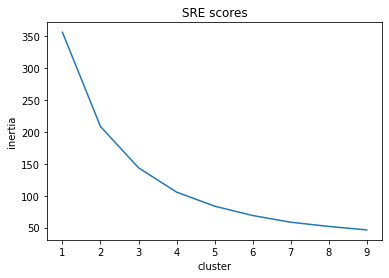

In [9]:
sre = []
for K in range(1, 10):
    model = KMeans(n_clusters=K)
    model.fit_predict(df_cluster)
    sre.append(model.inertia_)

plt.plot(range(1,10), sre)
plt.title("SRE scores")
plt.xlabel("cluster")
plt.ylabel("inertia")

plt.show()

In the SRE score curve the elbow is formed at 3, thus the optimal number of clusters is 3.  
In the clustering algorithms we will use number of clusters, K = 3

K Means implementation

> K = 3

In [10]:
k = 3
df_kmeans = df_cluster.copy()

In [11]:
X = df_kmeans.values


Visualize data points before clustering

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


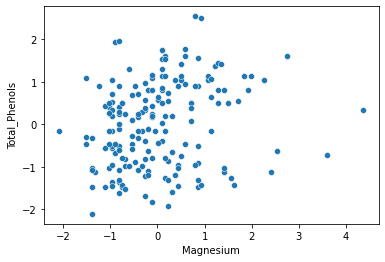

In [12]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('Magnesium')
plt.ylabel('Total_Phenols')
plt.show()

In [13]:
# K-Means implementation
diff = 1
cluster = np.zeros(X.shape[0])
centroids = df_kmeans.sample(n=k).values
while diff:
  # for each observation
  for i, row in enumerate(X):    
    mn_dist = float('inf')    
    # dist of the point from all centroids    
    for idx, centroid in enumerate(centroids):      
      d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)      
      # store closest centroid      
      if mn_dist > d:        
        mn_dist = d
        cluster[i] = idx        
  new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values    
  # if centroids are same then leave
  print(centroids)
  print(new_centroids)
  if np.count_nonzero(centroids-new_centroids) == 0:
    diff = 0
  else: 
    centroids = new_centroids


[[-1.03505509 -1.03368389]
 [ 0.86070511 -0.50491447]
 [ 1.14155847  1.06537044]]
[[-0.80617784 -0.50470638]
 [ 0.59489746 -0.59685779]
 [ 0.62864407  1.08356641]]
[[-0.80617784 -0.50470638]
 [ 0.59489746 -0.59685779]
 [ 0.62864407  1.08356641]]
[[-0.77281249 -0.39661231]
 [ 0.73978213 -0.85431177]
 [ 0.63578441  1.0792211 ]]
[[-0.77281249 -0.39661231]
 [ 0.73978213 -0.85431177]
 [ 0.63578441  1.0792211 ]]
[[-0.75089757 -0.37408882]
 [ 0.8080451  -1.00814673]
 [ 0.62244017  1.05013516]]
[[-0.75089757 -0.37408882]
 [ 0.8080451  -1.00814673]
 [ 0.62244017  1.05013516]]
[[-0.73079728 -0.3717552 ]
 [ 0.9753869  -1.04917309]
 [ 0.56258617  1.046195  ]]
[[-0.73079728 -0.3717552 ]
 [ 0.9753869  -1.04917309]
 [ 0.56258617  1.046195  ]]
[[-0.72547809 -0.38656044]
 [ 1.01807984 -1.02760608]
 [ 0.56258617  1.046195  ]]
[[-0.72547809 -0.38656044]
 [ 1.01807984 -1.02760608]
 [ 0.56258617  1.046195  ]]
[[-0.72547809 -0.38656044]
 [ 1.01807984 -1.02760608]
 [ 0.56258617  1.046195  ]]


In [14]:

df_kmeans['clusters'] = cluster
df_kmeans.head()

,magnesium,total_phenols,clusters
0,1.913905,0.808997,2.0
1,0.018145,0.568648,2.0
2,0.088358,0.808997,2.0
3,0.930918,2.491446,2.0
4,1.281985,0.808997,2.0


Visualize the clusters formed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


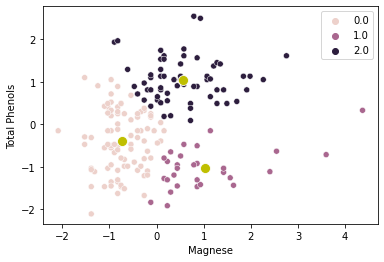

In [15]:
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Magnese')
plt.ylabel('Total Phenols')
plt.show()

## Sections 3: Hierarchical clustering (not from scratch)

In [16]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [17]:
df_hierachical = df_cluster.copy()
df_hierachical.head(2)

,magnesium,total_phenols
0,1.913905,0.808997
1,0.018145,0.568648


Using Dandrogram to decide the optimal number of clusters

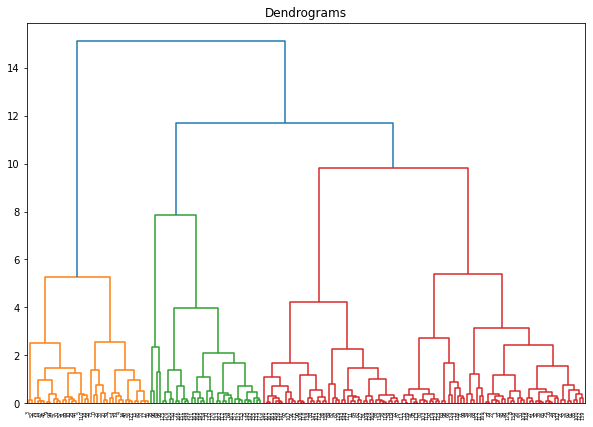

In [18]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_hierachical, method='ward'))


The largest vertical line in Dendrogram is the blue line. It has approximate value 16. We can decide the threshhold of 8 to cut the dendrogram.

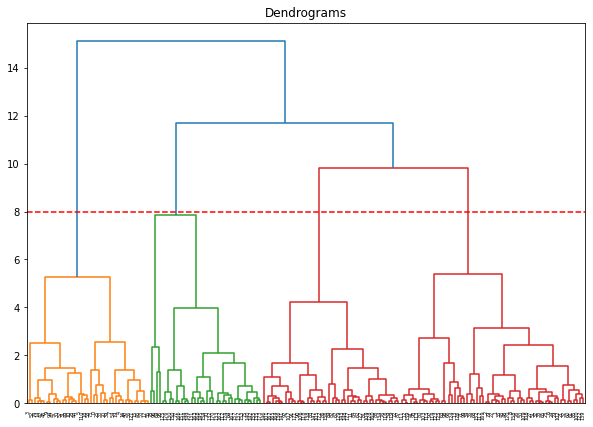

In [19]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_hierachical, method='ward'))
plt.axhline(y=8, color='r', linestyle='--')

The line cuts the dendrogram at 4 points, so we will be having 4 clusters. Now lets apply hierarchical clutering of 4 clusters.

In [20]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_hierachical)

array([1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 3, 2, 0, 2,
       2, 3, 2, 0, 0, 2, 3, 1, 1, 0, 3, 0, 0, 2, 2, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 1, 0, 0, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2,
       1, 2, 0, 2, 2, 2, 3, 2, 3, 3, 2, 1, 2, 2, 2, 2, 2, 3, 3, 3, 0, 0,
       0, 0, 3, 0, 3, 0, 3, 2, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 2, 0,
       0, 0, 3, 0, 2, 2, 3, 0, 0, 0, 3, 3, 0, 3, 0, 2, 0, 3, 3, 0, 0, 0,
       0, 3])

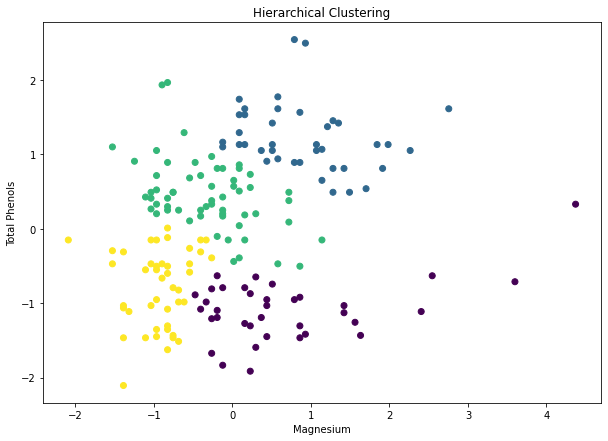

In [21]:
plt.figure(figsize=(10, 7))  
plt.xlabel("Magnesium")
plt.ylabel("Total Phenols")
plt.title("Hierarchical Clustering")
plt.scatter(df_hierachical['magnesium'], df_hierachical['total_phenols'], c=cluster.labels_) 

## Section 4: Gaussian mixture models clustering (not from scratch)



First step is to find the optimal numbers of clusters in the data. We are going to find this by plotting AIC/BIC score for various number of clusters.

In [22]:
from sklearn.mixture import GaussianMixture

In [23]:
#Data preparation
df_gmm = df_cluster.copy()
data_gmm = df_gmm.values

In [24]:
# Finding AIC/BIC score
n_range = range(2,10)
bic = []
aic = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(data_gmm)        
    bic.append(gm.bic(data_gmm))
    aic.append(gm.aic(data_gmm))    

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

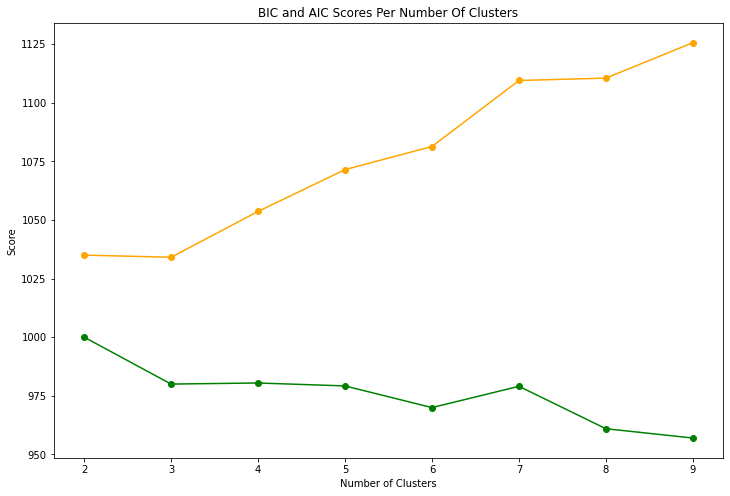

In [25]:
#Plot AIC/BIC scores
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic, '-o', color='orange')
ax.plot(n_range, aic, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

As we can see in the plot that after the cluster count 6, the AIC/BIC values starts levelling off. So the optimal number of clusters for our data is 6.

In [26]:
# Implementing GMM clustering
gm = GaussianMixture(n_components=6, random_state=123, n_init=10)
preds = gm.fit_predict(data_gmm)

Plotting the Clusters

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


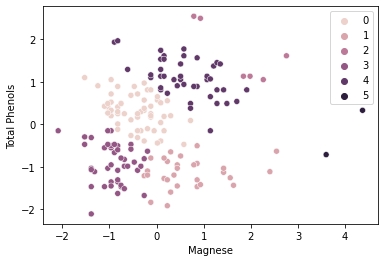

In [27]:
sns.scatterplot(data_gmm[:,0], data_gmm[:, 1], hue=preds)
plt.xlabel('Magnese')
plt.ylabel('Total Phenols')
plt.show()

## Section 5: DB Scan Clustering
DB Scan clustering (not from scratch) using pycaret library 

In [28]:
!pip install pycaret

In [29]:
from pycaret.clustering import *
from pycaret.datasets import get_data
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [48]:
df_dbscan = df_cluster.copy()
df_dbscan.head(2)

,magnesium,total_phenols
0,1.913905,0.808997
1,0.018145,0.568648


In [49]:
df_dbscan.shape

(178, 2)

In [50]:
#Data setup
data_setup = setup(df_dbscan)

,Description,Value
0,session_id,5426
1,Original Data,"(178, 2)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(178, 2)"
9,CPU Jobs,-1


In [52]:
model = create_model('dbscan', eps=0.1, min_samples=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


In [53]:
print(model)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)


In [55]:
model_df = assign_model(model)

In [56]:
model_df.head()

,magnesium,total_phenols,Cluster
0,1.913905,0.808997,Cluster -1
1,0.018145,0.568648,Cluster -1
2,0.088358,0.808997,Cluster -1
3,0.930918,2.491446,Cluster -1
4,1.281985,0.808997,Cluster -1


In [57]:
model_df.Cluster.value_counts()

Cluster -1    178
Name: Cluster, dtype: int64

In [58]:
plot_model(model, plot="cluster")